# Loading Dependency

In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [43]:
sns.set_theme()

# Loading data Files

In [46]:
file_path = os.path.join(os.getcwd(), "Data Folder/traffic.csv")

raw_data = pd.read_csv(file_path)

In [48]:
raw_data.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


# EDA

In [51]:
df = raw_data.copy()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [76]:
# Converting the date column into date time format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [10]:
df.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,226278,226278,226267,226267,226241,226273,226273,219157,226278
unique,3,7,211,11993,2419,3254,3562,709,3839
top,pageview,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,142015,35361,47334,22791,40841,40841,40841,40841,40841


In [11]:
# No of Missing values
df.isnull().sum()

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64

Text(0, 0.5, 'Frequency')

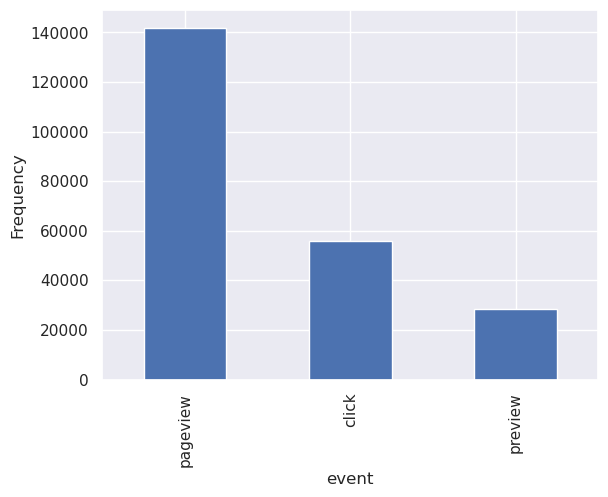

In [12]:
df['event'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')

<Axes: xlabel='country'>

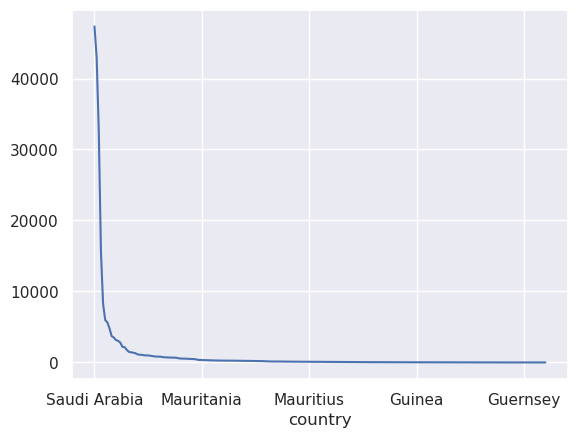

In [13]:
# df['country'].value_counts().plot()
df['country'].value_counts().plot()
# Maxium click done in saudai arabia

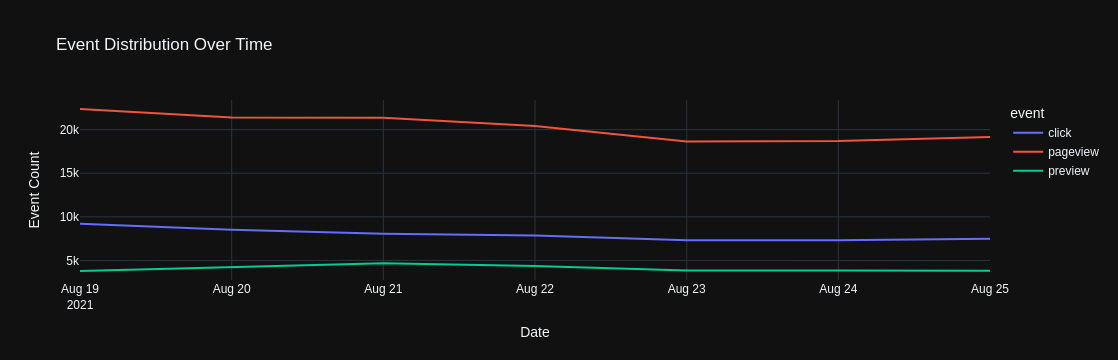

In [78]:
event_counts_over_time = df.groupby([df['date'].dt.date, 'event']).size().unstack().fillna(0).reset_index()

# convert wide data into long format
event_counts_melted = event_counts_over_time.melt(id_vars='date', value_vars=event_counts_over_time.columns[1:],
                                                  var_name='event', value_name='count')

fig = px.line(event_counts_melted, x='date', y='count', color='event',
              title='Event Distribution Over Time', labels={'count': 'Event Count', 'date': 'Date'},
              template='plotly_dark')

fig.show()

In [74]:

# 7. Correlation Between City, Country, and Event Type
city_event_correlation = df.pivot_table(index='city', columns='event', values='linkid', aggfunc='count', fill_value=0).corr()
country_event_correlation = df.pivot_table(index='country', columns='event', values='linkid', aggfunc='count', fill_value=0).corr()

print("|Correlation between country and event types:\n")
country_event_correlation

|Correlation between country and event types:



event,click,pageview,preview
event,,,
click,1.000000,0.990118,0.859197
pageview,0.990118,1.000000,0.920421
preview,0.859197,0.920421,1.000000


In [72]:
print("Correlation between city and event types:\n")
city_event_correlation

Correlation between city and event types:



event,click,pageview,preview
event,,,
click,1.000000,0.989534,0.937326
pageview,0.989534,1.000000,0.975219
preview,0.937326,0.975219,1.000000


## Total and Daily Pageview Events

In [16]:
daily_pageviews = df[df['event'] == 'pageview'].groupby(df['date'].dt.date)['event'].count()

avg_pageviews_per_day = daily_pageviews.mean()
print("\nAverage Pageviews per Day:", avg_pageviews_per_day)


Average Pageviews per Day: 20287.85714285714


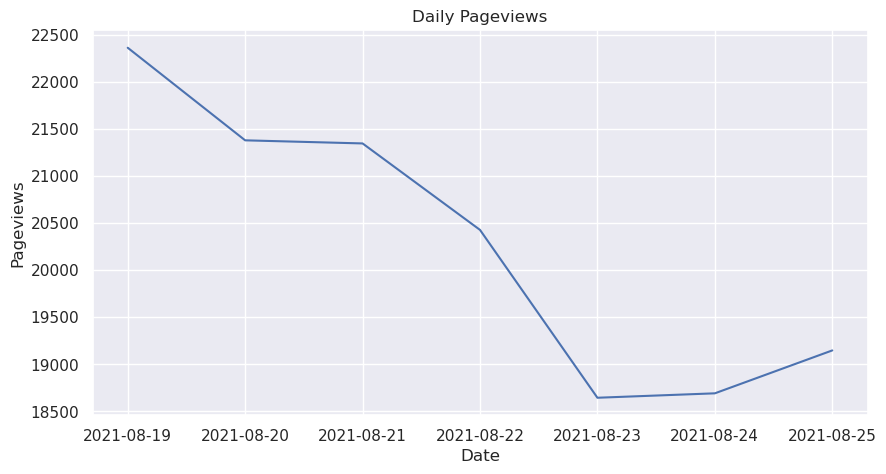

In [17]:
pageview_total = df['event'].value_counts().get('pageview', 0)
daily_pageviews = df[df['event'] == 'pageview'].groupby(df['date'].dt.date)['event'].count()

plt.figure(figsize=(10, 5))
daily_pageviews.plot(kind='line', title='Daily Pageviews', xlabel='Date', ylabel='Pageviews')
plt.show()

## Gegraphical distribution of event

In [19]:
# df_geo = df.dropna(subset=['country', 'city'])

# df_geo['location'] = df_geo['city'] + ', ' + df_geo['country']

# # Plot geographical map (Note: lat/lon info required for more precise city plotting)
# fig = px.scatter_geo(df_geo, locations="country", locationmode='country names',
#                      hover_name="location", color="event",
#                      title="Geographical Distribution of Events (by Country and City)",
#                      template="plotly_dark")

# # Show the plot
# fig.show()

## CTR Analysis

In [21]:
pageviews = df['event'].value_counts().get('pageview', 0)
clicks = df['event'].value_counts().get('click', 0)
ctr_overall = (clicks / pageviews) * 100 if pageviews > 0 else 0


ctr_per_link = df[df['event'].isin(['pageview', 'click'])].groupby(['linkid', 'event']).size().unstack().fillna(0)
ctr_per_link['CTR'] = (ctr_per_link['click'] / ctr_per_link['pageview']) * 100
print("Overall Click Through Rate (CTR): {:.2f}%".format(ctr_overall))
print("CTR per link:\n")
ctr_per_link[['CTR']]

Overall Click Through Rate (CTR): 39.24%
CTR per link:



event,CTR
linkid,
00073307-ae96-5089-a117-4783afb42f8e,0.0
00126b32-0c35-507b-981c-02c80d2aa8e7,100.0
0018cfff-50a1-5984-9715-01ef2d11a49a,0.0
0033934b-5d16-5a06-af58-d087bcdd3680,0.0
0034d6cf-3bd8-5ffe-aafc-b3959fc48608,0.0
...,...
fff38ca0-8043-50cd-a5f1-f65ebb7105c5,100.0
fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7,0.0
fff84c0e-90a1-59d8-9997-adc909d50e16,100.0


In [22]:
# 4. Correlation Analysis (between clicks and pageviews on a link)
correlation = ctr_per_link[['pageview', 'click']].corr()
correlation

event,pageview,click
event,,
pageview,1.000000,0.994001
click,0.994001,1.000000


In [23]:

ctr_per_link[['CTR']].describe()

event,CTR
count,3839.000000
mean,inf
std,NaN
min,0.000000
25%,0.000000
50%,38.947368
75%,100.000000
max,inf
